In [1]:
%run SAT_help_functions.ipynb

In [3]:
data_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/SAT-Rafiei/data/data_sub"
sample_size = 30

In [14]:
df_all = pd.DataFrame()
valid_ratio_dfs = pd.DataFrame()

for i in range(sample_size):
    print(i)
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    
    counts_before = df['SAT'].value_counts()
    df = df[df["rt"]<5]
    counts_after = df['SAT'].value_counts()
    valid_ratio = counts_before/counts_after
    valid_ratio_df = valid_ratio.to_frame(i+1)
    valid_ratio_dfs = pd.concat((valid_ratio_dfs,valid_ratio_df), axis = 1)
    df_summarized = df.groupby(['SAT',"contrast"]).agg({'rt':'mean', "correct":'mean'})
    df_all = pd.concat((df_all, df_summarized))
    #print(df)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
    df_summarized = df.groupby(['SAT',"contrast"]).agg({'rt':'mean', "correct":'mean'})


In [78]:
df_all

,SAT,contrast,rt,correct
0,1,1,0.255708,0.465000
1,1,2,0.244637,0.570000
2,1,3,0.239324,0.580000
3,1,4,0.248248,0.505000
4,1,5,0.245275,0.425000
...,...,...,...,...
745,5,1,0.650969,0.735000
746,5,2,0.608925,0.750000
747,5,3,0.567667,0.859296
748,5,4,0.552892,0.930000


In [95]:
df_all_ave = df_all.groupby(['SAT',"contrast"]).agg({'rt':'mean', "correct":'mean'})
df_all_ave = df_all_ave.reset_index()

In [110]:
df_error = df_all.groupby(['SAT',"contrast"]).agg({'rt':'std', "correct":'std'})
df_error = df_error.reset_index()
df_error = df_error.rename(columns = {'rt':'rt_error', "correct":'correct_error'})/np.sqrt(30)


In [111]:
df_results = pd.concat((df_all_ave, df_error[["rt_error", "correct_error"]]), axis = 1)

Text(0, 0.5, 'P(Correct)')

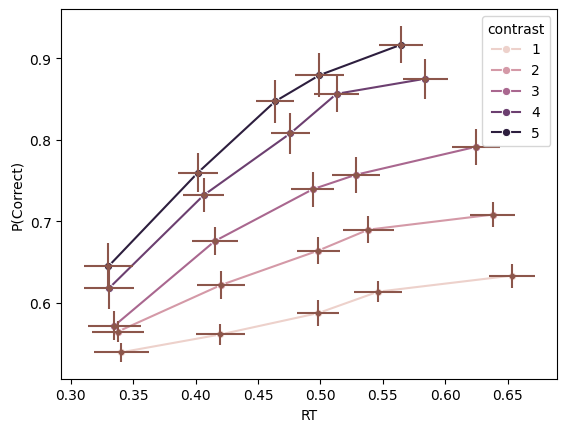

In [124]:
sns.lineplot(df_results,x = 'rt', y = 'correct', hue = "contrast", marker = "o")
plt.errorbar(df_results['rt'], df_results['correct'], fmt='.',
             xerr=df_results['rt_error'],
             yerr=df_results['correct_error'])
plt.xlabel("RT")
plt.ylabel("P(Correct)")

/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_39589/1343715733.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="timepoint", y="signal", ci='sd', err_style='bars')


ValueError: Could not interpret value `timepoint` for `x`. An entry with this name does not appear in `data`.

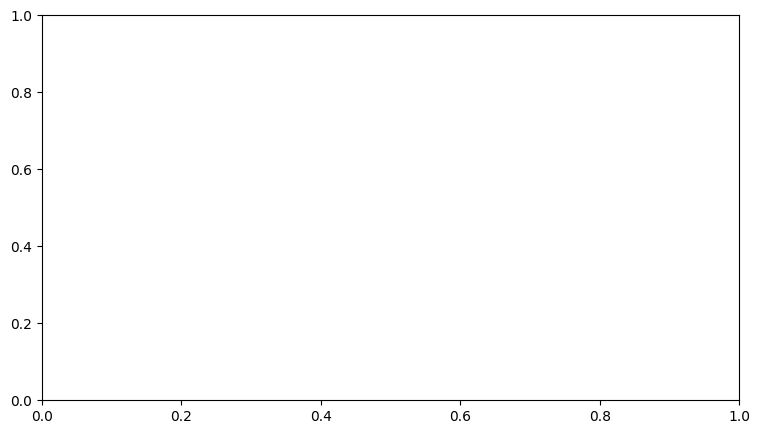

In [73]:
# Draw seaborn lineplot with error bars based on the standard deviation
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=df, x="timepoint", y="signal", ci='sd', err_style='bars')
sns.despine()
plt.show()

Text(0, 0.5, 'P(Correct)')

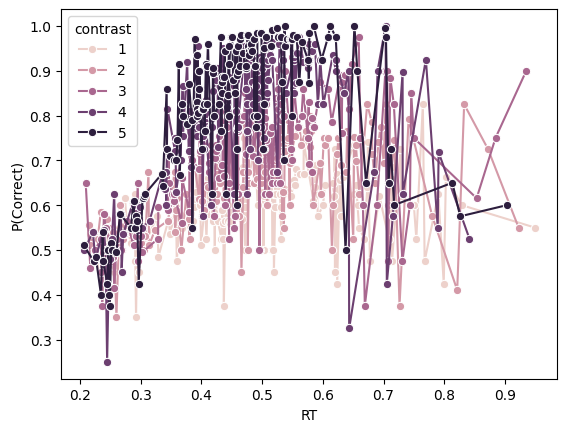

In [76]:
sns.lineplot(df_all,x = 'rt', y = 'correct', errorbar='ci', hue = "contrast", marker = "o")
plt.xlabel("RT")
plt.ylabel("P(Correct)")

In [ ]:
plt.errorbar(data['Month'], data['Subscriptions'], yerr=data['Error'])


In [64]:
pd.melt(df_all)

,variable,value
0,rt,0.255708
1,rt,0.244637
2,rt,0.239324
3,rt,0.248248
4,rt,0.245275
...,...,...
1495,correct,0.735000
1496,correct,0.750000
1497,correct,0.859296
1498,correct,0.930000


In [65]:
.columns.tolist()

['rt', 'correct']

,SAT,contrast,rt,correct
0,1,1,0.255708,0.465000
1,1,2,0.244637,0.570000
2,1,3,0.239324,0.580000
3,1,4,0.248248,0.505000
4,1,5,0.245275,0.425000
...,...,...,...,...
745,5,1,0.650969,0.735000
746,5,2,0.608925,0.750000
747,5,3,0.567667,0.859296
748,5,4,0.552892,0.930000


In [68]:
df_all

rt   correct
SAT contrast                    
1   1         0.255708  0.465000
    2         0.244637  0.570000
    3         0.239324  0.580000
    4         0.248248  0.505000
    5         0.245275  0.425000
...                ...       ...
5   1         0.650969  0.735000
    2         0.608925  0.750000
    3         0.567667  0.859296
    4         0.552892  0.930000
    5         0.513842  0.955000

[750 rows x 2 columns]